In [1]:
import scipy as sp
import matplotlib.pylab as plt
import seaborn as sea
import pandas as pd

%pylab inline

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
from example import read_games
recs = list(read_games())

In [3]:
from collections import defaultdict
topkeys = defaultdict(int)
for rec in recs:
    for k in rec['data'].keys():
        topkeys[k] += 1
print(list(sorted(topkeys.keys())))

['about_the_game', 'achievements', 'background', 'categories', 'controller_support', 'demos', 'detailed_description', 'developers', 'dlc', 'drm_notice', 'ext_user_account_notice', 'genres', 'header_image', 'is_free', 'legal_notice', 'linux_requirements', 'mac_requirements', 'metacritic', 'movies', 'name', 'package_groups', 'packages', 'pc_requirements', 'platforms', 'price_overview', 'publishers', 'recommendations', 'release_date', 'required_age', 'reviews', 'screenshots', 'short_description', 'steam_appid', 'support_info', 'supported_languages', 'type', 'website']


In [4]:
for ky,tot in sorted(topkeys.items()):
    count = 0
    uniq = set()
    mn, mx = None, None
    
    for rec in recs:
        val = rec['data'].get(ky, None)
        if not val:
            continue
        count += 1
        if isinstance(val, dict):
            val = "<DICT>"
        elif isinstance(val, list):
            val = "<LIST>"
        else:
            val = str(val).strip()
        uniq.add(val)
        if mn is None or val < mn:
            mn = val
        if mx is None or val > mx:
            mx = val
    print("%-25s %8d %8d %20s %20s" % (ky, tot, len(uniq), str(mn)[:20], str(mx)[:20]))
        

about_the_game               12624    11820 !nsane is a nod to t 日本語バージョンダウンロード開始されまし
achievements                  6793        1               <DICT>               <DICT>
background                   12624    11774 http://cdn.akamai.st http://cdn.akamai.st
categories                   12388        1               <LIST>               <LIST>
controller_support            3517        1                 full                 full
demos                         1162        1               <LIST>               <LIST>
detailed_description         12624    11821 !nsane is a nod to t 日本語バージョンダウンロード開始されまし
developers                   11989        1               <LIST>               <LIST>
dlc                           2111        1               <LIST>               <LIST>
drm_notice                      82       43 Act Control<br>5 mac                valve
ext_user_account_notice        144       89 1C Game Studios Acco       www.doak.co.za
genres                       11881        1           

In [5]:
from random import choice
from collections import Counter
from pprint import PrettyPrinter
pp = PrettyPrinter(width=120)
pprint = pp.pprint

def fields(name):
    for rec in recs:
        v = rec['data'].get(name, None)
        if v:
            yield v
            
field_values = list(fields('support_info'))
def out(v):
    pprint(v)
    print("")
out(field_values[0])
out(field_values[-1])
for _ in range(10):
    out(choice(field_values))


# def scan_values():
#     for fv in field_values:
#         free, purchase, subscript = False, False, False
#         for pg in fv:
#             if pg.get('is_recurring_subscription', '') == 'true':
#                 subscript = True
#             for s in pg.get('subs', list()):
#                 if s.get('is_free_license', None):
#                     free = True
#                 elif s.get('price_in_cents_with_discount', 0) > 0:
#                     purchase = True
#         yield (free, purchase, subscript)
# pprint(Counter(list(scan_values())))
           
# pprint(Counter([k for fv in field_values for k in fv.keys()]))

# pprint(Counter([i.get('description', 'MISSING').lower() for fv in field_values for i in fv]))

{'email': '', 'url': 'http://steamcommunity.com/app/10'}

{'email': 'jooomly@gmail.com', 'url': ''}

{'email': '', 'url': 'http://www.magix-audio.com/support/'}

{'email': '', 'url': ''}

{'email': '', 'url': ''}

{'email': 'thatsmytrunks@gmail.com', 'url': ''}

{'email': 'support@fallentreegames.com', 'url': 'http://www.fallentreegames.com/support'}

{'email': 'support@soedesco.com', 'url': ''}

{'email': 'xdgonx@yandex.ru', 'url': ''}

{'email': 'support@rondomedia.de', 'url': 'http://www.rondomedia.de/support.html'}

{'email': 'support@jetdogs.com', 'url': 'http://jetdogs.com'}

{'email': '', 'url': ''}



## Categories

Each of these should be boolean column (from list of dict's, check 'description')

* Co-op:Co-op|Local Co-op|Online Co-op
* Multiplayer:Cross-Platform Multiplayer|Local Multi-Player|Multi-player|Online Multi-Player|Shared/Split Screen
* In-App Purchases
* Includes Source SDK
* Includes level editor
* MMO
* Single-player
* VR Support

## Genres

Like categories, it's a list of dicts. Use the dict['description'] for text and discretize:

If description is empty string, then ignore it.

All descriptions not described below are GenreIsOther

These descriptions become GenreIsXXX:

* indie
* action
* adventure
* casual
* strategy
* rpg
* simulation
* early access
* free to play
* sports
* racing
* massively multiplayer

These description become GenreIsNotGame:

* utilities
* design & illustration
* animation & modeling
* software training
* education
* audio production
* video production
* web publishing
* photo editing
* accounting


## Requirements

Applied to linux_requirements, mac_requirements, and pc_requirements

Value is dictionary with possible keys:

* minimum
* recommended

Turn into boolean, i.e.

* LinuxReqsHaveMin = True if val.get('minimum', '') else False
* LinuxReqsHaveRec = True if val.get('recommended', '') else False
* MacReqsHaveMin = True if val.get('minimum', '') else False
* MacReqsHaveRec = True if val.get('recommended', '') else False
* PCReqsHaveMin = True if val.get('minimum', '') else False
* PCReqsHaveRec = True if val.get('recommended', '') else False


## Package Groups

3 boolean columns: FreeVerAvail, PurchaseAvail, SubscriptionAvail

Code for all:

````
def package_groups(rec):
    pgs = rec.get("data", dict()).get("package_groups", list)
    free, purchase, subscript = False, False, False
    for pg in pgs:
        if pg.get('is_recurring_subscription', '') == 'true':
            subscript = True
        for s in pg.get('subs', list()):
            if s.get('is_free_license', None):
                free = True
            elif s.get('price_in_cents_with_discount', 0) > 0:
                purchase = True
    return (free, purchase, subscript)
````


In [6]:
# Attempt to read our shiny CSV file
gf = pd.read_csv('games-features.csv')
print(gf.columns)
gf.head()

Index(['QueryID', 'ResponseID', 'QueryName', 'ResponseName', 'ReleaseDate',
       'RequiredAge', 'DemoCount', 'DeveloperCount', 'DLCCount', 'Metacritic',
       'MovieCount', 'PackageCount', 'RecommendationCount', 'PublisherCount',
       'ScreenshotCount', 'AchievementCount', 'AchievementHighlightedCount',
       'ControllerSupport', 'IsFree', 'FreeVerAvail', 'PurchaseAvail',
       'SubscriptionAvail', 'PlatformWindows', 'PlatformLinux', 'PlatformMac',
       'PCReqsHaveMin', 'PCReqsHaveRec', 'LinuxReqsHaveMin',
       'LinuxReqsHaveRec', 'MacReqsHaveMin', 'MacReqsHaveRec',
       'CategorySinglePlayer', 'CategoryMultiplayer', 'CategoryCoop',
       'CategoryMMO', 'CategoryInAppPurchase', 'CategoryIncludeSrcSDK',
       'CategoryIncludeLevelEditor', 'CategoryVRSupport', 'GenreIsNonGame',
       'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
       'GenreIsStrategy', 'GenreIsRPG', 'GenreIsSimulation',
       'GenreIsEarlyAccess', 'GenreIsFreeToPlay', 'GenreIsSp

,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,...,LegalNotice,Reviews,SupportedLanguages,Website,PCMinReqsText,PCRecReqsText,LinuxMinReqsText,LinuxRecReqsText,MacMinReqsText,MacRecReqsText
0,10,10,Counter-Strike,Counter-Strike,Nov 1 2000,0,0,1,0,88,...,,,English French German Italian Spanish Simplifi...,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
1,20,20,Team Fortress Classic,Team Fortress Classic,Apr 1 1999,0,0,1,0,0,...,,,English French German Italian Spanish,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
2,30,30,Day of Defeat,Day of Defeat,May 1 2003,0,0,1,0,79,...,,,English French German Italian Spanish,http://www.dayofdefeat.com/,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
3,40,40,Deathmatch Classic,Deathmatch Classic,Jun 1 2001,0,0,1,0,0,...,,,English French German Italian Spanish,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
4,50,50,Half-Life: Opposing Force,Half-Life: Opposing Force,Nov 1 1999,0,0,1,0,0,...,,,English French German Korean,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,


DemoCount  > 0
count    1162.000000
mean        1.001721
std         0.041469
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: DemoCount, dtype: float64

DLCCount  > 0
count    2111.000000
mean        5.052108
std        24.812933
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       630.000000
Name: DLCCount, dtype: float64

RecommendationCount  > 0
count       4863.000000
mean        3232.043389
std        25019.718648
min          101.000000
25%          201.000000
50%          441.000000
75%         1405.500000
max      1427633.000000
Name: RecommendationCount, dtype: float64



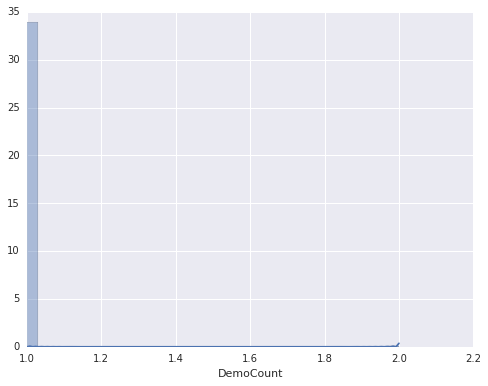

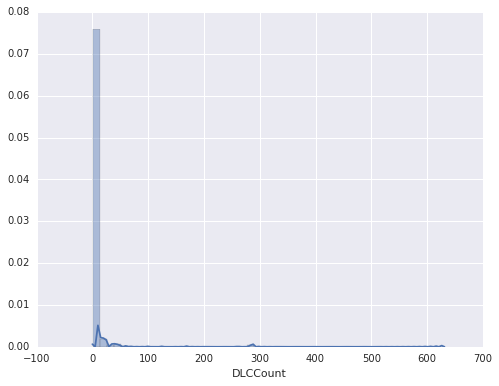

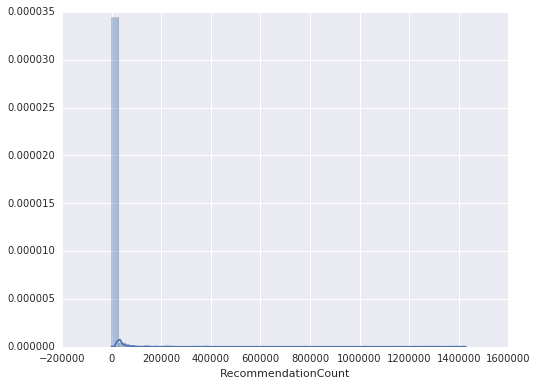

In [7]:
def invest(cname):
    print(cname, " > 0")
    nums = gf[gf[cname] > 0][cname]
    print(nums.describe())
    plt.figure(figsize=(8,6))
    sea.distplot(nums)
    print("")
invest("DemoCount")
invest("DLCCount")
invest("RecommendationCount")

In [9]:
gf["PCMinReqsText"]

0        Minimum: 500 mhz processor 96mb ram 16mb video...
1        Minimum: 500 mhz processor 96mb ram 16mb video...
2        Minimum: 500 mhz processor 96mb ram 16mb video...
3        Minimum: 500 mhz processor 96mb ram 16mb video...
4        Minimum: 500 mhz processor 96mb ram 16mb video...
5        Minimum: 500 mhz processor 96mb ram 16mb video...
6        Minimum: 500 mhz processor 96mb ram 16mb video...
7        Minimum: 500 mhz processor 96mb ram 16mb video...
8        Minimum: 500 mhz processor 96mb ram 16mb video...
9        Minimum: 500 mhz processor 96mb ram 16mb video...
10                                                        
11       Minimum: 1.7 GHz Processor 512MB RAM DirectX® ...
12       Minimum: 1.2 GHz Processor 256MB RAM DirectX 7...
13       Minimum: 1.7 GHz Processor 512MB RAM DirectX® ...
14       Minimum: 1.2 GHz Processor 256MB RAM DirectX 7...
15       Minimum: Pentium 4 2.4GHz or AMD 2800+ Process...
16       Minimum:OS: Windows(r) 7 (32/64-bit)/Vista/XPP.